<a href="https://colab.research.google.com/github/4lparslan/MLP_vs_CNN/blob/main/MLP_CNN_Network_Comparison_YouTube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing required libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.models import Sequential
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

#Importing CIFAR-10 dataset

In [2]:
# Uploading the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


#Visualizing the dataset

In [3]:
# Explore the dataset size
x_train.shape[0] + x_test.shape[0]

60000

In [4]:
# CIFAR-10 class names
# https://keras.io/api/datasets/cifar10/
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

<function matplotlib.pyplot.show(close=None, block=None)>

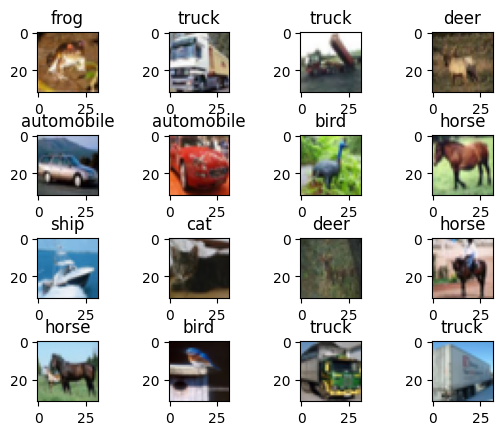

In [5]:
# Display first 16 images in x_train dataset with their labels
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(x_train[i])
  plt.title(class_names[y_train[i][0]])
plt.subplots_adjust(wspace=0.3, hspace=0.7)
plt.show

#Checking test-train ratio

In [6]:
# Size of training dataset and number of samples
print("Size of train dataset:", x_train.shape)
print("Number of train samples:", len(x_train))

# Size of test dataset and number of samples
print("\nSize of test dataset:", x_test.shape)
print("Number of test samples:", len(x_test))

# Ratio of test and train data set to the whole data set
print("\nTest Ratio: ", round(len(x_test) / (len(x_test) + len(x_train)), 2))
print("Train Ratio: ", round(len(x_train) / (len(x_test) + len(x_train)), 2))

Size of train dataset: (50000, 32, 32, 3)
Number of train samples: 50000

Size of test dataset: (10000, 32, 32, 3)
Number of test samples: 10000

Test Ratio:  0.17
Train Ratio:  0.83


#Redetermining the test-train ratio

In [7]:
# Normalize the dataset
x_train, x_test = x_train / 255.0, x_test / 255.0

In [8]:
# Concatenate train and test dataset, then determine the ratio as 30/70
x_combined = np.concatenate((x_train, x_test), axis=0)
y_combined = np.concatenate((y_train, y_test), axis=0)
x_train, x_test, y_train, y_test = train_test_split(x_combined, y_combined, test_size=0.3, random_state=42)

In [9]:
# Recalculating the ratio of test and train dataset to the entire dataset
print("\nNew Test Ratio: ", round(len(x_test) / (len(x_test) + len(x_train)), 2))
print("New Train Ratio: ", round(len(x_train) / (len(x_test) + len(x_train)), 2))


New Test Ratio:  0.3
New Train Ratio:  0.7


#PART 1: MLP

#Creating Multilayer Perceptron Model

In [10]:
# Create sequential model
model_MLP = models.Sequential()

In [11]:
# Input layer
model_MLP.add(layers.Flatten(input_shape=(32, 32, 3)))

In [12]:
# Hidden layers
model_MLP.add(layers.Dense(128, activation='relu'))
model_MLP.add(layers.Dense(128, activation='relu'))
model_MLP.add(layers.Dense(128, activation='relu'))
model_MLP.add(layers.Dense(128, activation='relu'))
model_MLP.add(layers.Dense(128, activation='relu'))

In [13]:
# Output layer
model_MLP.add(layers.Dense(10, activation='softmax'))

In [14]:
# Create model summary
model_MLP.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 10)                1

In [15]:
# Compiling the model
model_MLP.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Training the model

In [16]:
# Training the model
history = model_MLP.fit(x_train, y_train, epochs=5, validation_split=0.2, batch_size=64)

Epoch 1/5
525/525 [==============================] - 11s 9ms/step - loss: 1.9465 - accuracy: 0.2859 - val_loss: 1.8065 - val_accuracy: 0.3473
Epoch 2/5
525/525 [==============================] - 2s 4ms/step - loss: 1.7696 - accuracy: 0.3600 - val_loss: 1.7271 - val_accuracy: 0.3765
Epoch 3/5
525/525 [==============================] - 2s 4ms/step - loss: 1.6937 - accuracy: 0.3896 - val_loss: 1.7016 - val_accuracy: 0.3768
Epoch 4/5
525/525 [==============================] - 3s 6ms/step - loss: 1.6279 - accuracy: 0.4139 - val_loss: 1.6877 - val_accuracy: 0.3775
Epoch 5/5
525/525 [==============================] - 2s 4ms/step - loss: 1.5841 - accuracy: 0.4302 - val_loss: 1.6140 - val_accuracy: 0.4118


# Evaluate the model


In [17]:
# Model evaluation
prediction = model_MLP.evaluate(x_test, y_test)
print(f'Test Accuracy : {prediction[1] * 100:.2f}%')

563/563 [==============================] - 1s 2ms/step - loss: 1.6139 - accuracy: 0.4085
Test Accuracy : 40.85%


#Results

In [18]:
# Creating subplots with 1 row and 2 columns
figure, axis = plt.subplots(1, 2, figsize=(12, 6))

# Creating accuracy chart
axis[0].plot(history.history['accuracy'], label='Training Accuracy')
axis[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axis[0].set_xlabel('Epoch')
axis[0].set_ylabel('Accuracy')
axis[0].set_title("Accuracy")
axis[0].legend()

# Creating loss chart
axis[1].plot(history.history['loss'], label='Training Loss')
axis[1].plot(history.history['val_loss'], label='Validation Loss')
axis[1].set_xlabel('Epoch')
axis[1].set_ylabel('Loss')
axis[1].set_title("Loss")
axis[1].legend()

# Saving the chart
plt.savefig("accuracy-loss-mlp.png")
plt.close()

In [19]:
# Making predictions on the test dataset
y_pred = model_MLP.predict(x_test)
y_pred_classes = tf.argmax(y_pred, axis=1)

563/563 [==============================] - 1s 2ms/step


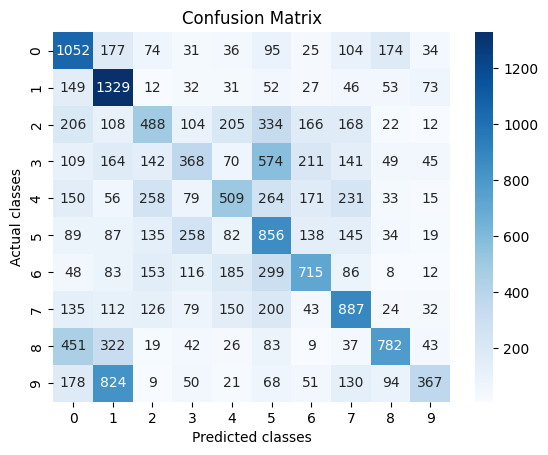

In [20]:
# Creating confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Visualizing the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

# Saving the confusion matrix
plt.savefig("confusion-matrix-mlp.png")

In [21]:
# Create classification report
print('\nClassification Report:\n', classification_report(y_test, y_pred_classes))


Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.58      0.48      1802
           1       0.41      0.74      0.52      1804
           2       0.34      0.27      0.30      1813
           3       0.32      0.20      0.24      1873
           4       0.39      0.29      0.33      1766
           5       0.30      0.46      0.37      1843
           6       0.46      0.42      0.44      1705
           7       0.45      0.50      0.47      1788
           8       0.61      0.43      0.51      1814
           9       0.56      0.20      0.30      1792

    accuracy                           0.41     18000
   macro avg       0.43      0.41      0.40     18000
weighted avg       0.42      0.41      0.40     18000



#PART 2: CNN

#Creating Convolutional Neural Network Model

In [22]:
# Create sequential model
model_CNN = Sequential()

In [23]:
## Convolutional layers

# Convolutional Layer 1
model_CNN.add(Conv2D(filters = 128, kernel_size = (3,3), input_shape = (32, 32, 3), activation = 'relu', padding='same'))
model_CNN.add(BatchNormalization())

# Convolutional Layer 2
model_CNN.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model_CNN.add(BatchNormalization())

# Pooling Layer
model_CNN.add(MaxPool2D( pool_size = (2,2)))

# Dropout Layer
model_CNN.add(Dropout(0.25))

# Convolutional Layer 3
model_CNN.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model_CNN.add(BatchNormalization())

# Convolutional Layer 4
model_CNN.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model_CNN.add(BatchNormalization())

# Convolutional Layer 5
model_CNN.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model_CNN.add(BatchNormalization())

# Pooling Layer
model_CNN.add(MaxPool2D(pool_size=(2, 2)))

# Dropout Layer
model_CNN.add(Dropout(0.25))

In [24]:
# Flattening Layer
model_CNN.add(Flatten())

In [25]:
# Fully Connected Layers
model_CNN.add(Dense(128, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
model_CNN.add(Dropout(0.25))
model_CNN.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_CNN.add(Dropout(0.25))
model_CNN.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_CNN.add(Dropout(0.25))

In [26]:
# Çıkış katmanı
model_CNN.add(Dense(10, activation = 'softmax'))

In [27]:
# Create model summary
model_CNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 128)       3584      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 128)       512       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 128)       512       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 128)       0         
 D)                                                              
                                                      

In [28]:
# Compiling the model
model_CNN.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam',
metrics = 'accuracy')

#Training the model

In [29]:
# Training the model
history = model_CNN.fit(x_train, y_train, epochs=5, validation_split=0.2, batch_size=64)

Epoch 1/5
525/525 [==============================] - 27s 37ms/step - loss: 3.1440 - accuracy: 0.3856 - val_loss: 2.1018 - val_accuracy: 0.4577
Epoch 2/5
525/525 [==============================] - 17s 33ms/step - loss: 1.6277 - accuracy: 0.5888 - val_loss: 1.7384 - val_accuracy: 0.5600
Epoch 3/5
525/525 [==============================] - 18s 33ms/step - loss: 1.4107 - accuracy: 0.6584 - val_loss: 1.5124 - val_accuracy: 0.6301
Epoch 4/5
525/525 [==============================] - 19s 36ms/step - loss: 1.3502 - accuracy: 0.6951 - val_loss: 1.8747 - val_accuracy: 0.5573
Epoch 5/5
525/525 [==============================] - 18s 34ms/step - loss: 1.2887 - accuracy: 0.7274 - val_loss: 1.3505 - val_accuracy: 0.7027


#Model Evaluation

In [30]:
prediction = model_CNN.evaluate(x_test, y_test)
print(f'Test Accuracy : {prediction[1] * 100:.2f}%')

563/563 [==============================] - 3s 5ms/step - loss: 1.3475 - accuracy: 0.7017
Test Accuracy : 70.17%


#Results

In [31]:
# Creating subplots with 1 row and 2 columns
figure, axis = plt.subplots(1, 2, figsize=(12, 6))

# Creating accuracy chart
axis[0].plot(history.history['accuracy'], label='Training Accuracy')
axis[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axis[0].set_xlabel('Epoch')
axis[0].set_ylabel('Accuracy')
axis[0].set_title("Accuracy")
axis[0].legend()

# Creating loss chart
axis[1].plot(history.history['loss'], label='Training Loss')
axis[1].plot(history.history['val_loss'], label='Validation Loss')
axis[1].set_xlabel('Epoch')
axis[1].set_ylabel('Loss')
axis[1].set_title("Loss")
axis[1].legend()

# Saving the chart
plt.savefig("accuracy-loss-cnn.png")
plt.close()

In [32]:
# Making predictions on the test dataset
y_pred = model_CNN.predict(x_test)
y_pred_classes = tf.argmax(y_pred, axis=1)

563/563 [==============================] - 2s 4ms/step


In [33]:
# Creating confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Visualizing the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

# Saving the confusion matrix
plt.savefig("confusion-matrix-cnn.png")
plt.close()

In [34]:
# Create classification report
print('\nClassification Report:\n', classification_report(y_test, y_pred_classes))


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.65      0.74      1802
           1       0.84      0.90      0.87      1804
           2       0.57      0.67      0.62      1813
           3       0.64      0.32      0.42      1873
           4       0.77      0.37      0.50      1766
           5       0.60      0.70      0.65      1843
           6       0.53      0.92      0.68      1705
           7       0.73      0.80      0.76      1788
           8       0.91      0.79      0.84      1814
           9       0.76      0.91      0.83      1792

    accuracy                           0.70     18000
   macro avg       0.72      0.70      0.69     18000
weighted avg       0.72      0.70      0.69     18000



#Comparing MLP and CNN models

In [35]:
model_MLP.summary()
model_CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 10)                1

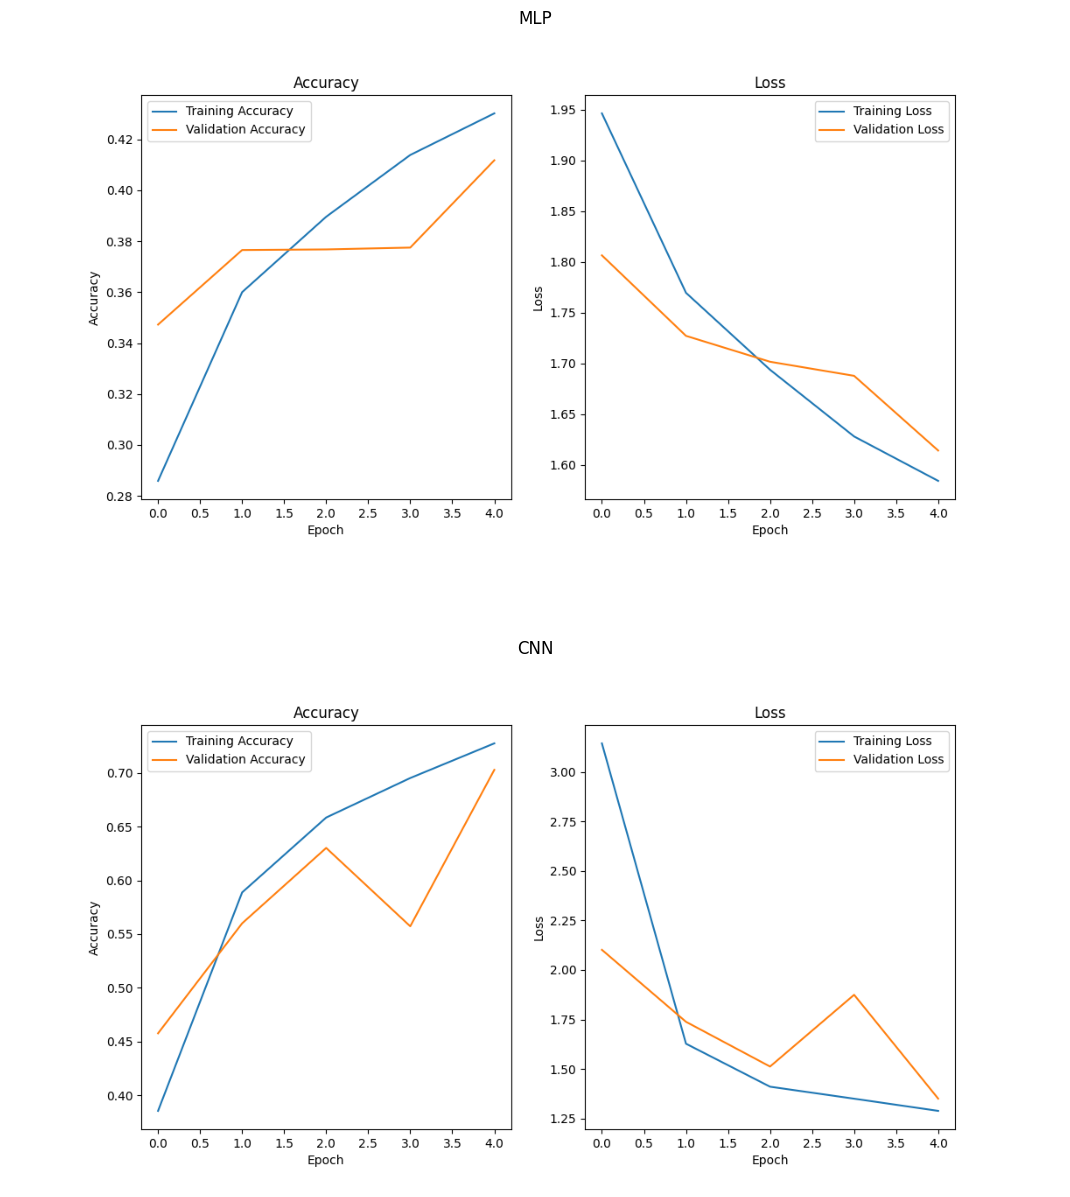

In [36]:
# İki resmi imread ile oku
image1 = cv2.imread('accuracy-loss-mlp.png')
image2 = cv2.imread('accuracy-loss-cnn.png')

# Renk düzenini OpenCV'den Matplotlib'e çevir
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# İki resmi yan yana göstermek için subplot oluştur
fig, axes = plt.subplots(2, 1, figsize=(15, 15))

# İlk subplot
axes[0].imshow(image1_rgb)
axes[0].set_title('MLP')
axes[0].axis('off')

# İkinci subplot
axes[1].imshow(image2_rgb)
axes[1].set_title('CNN')
axes[1].axis('off')

# Görüntüleri göster
plt.show()
plt.close()

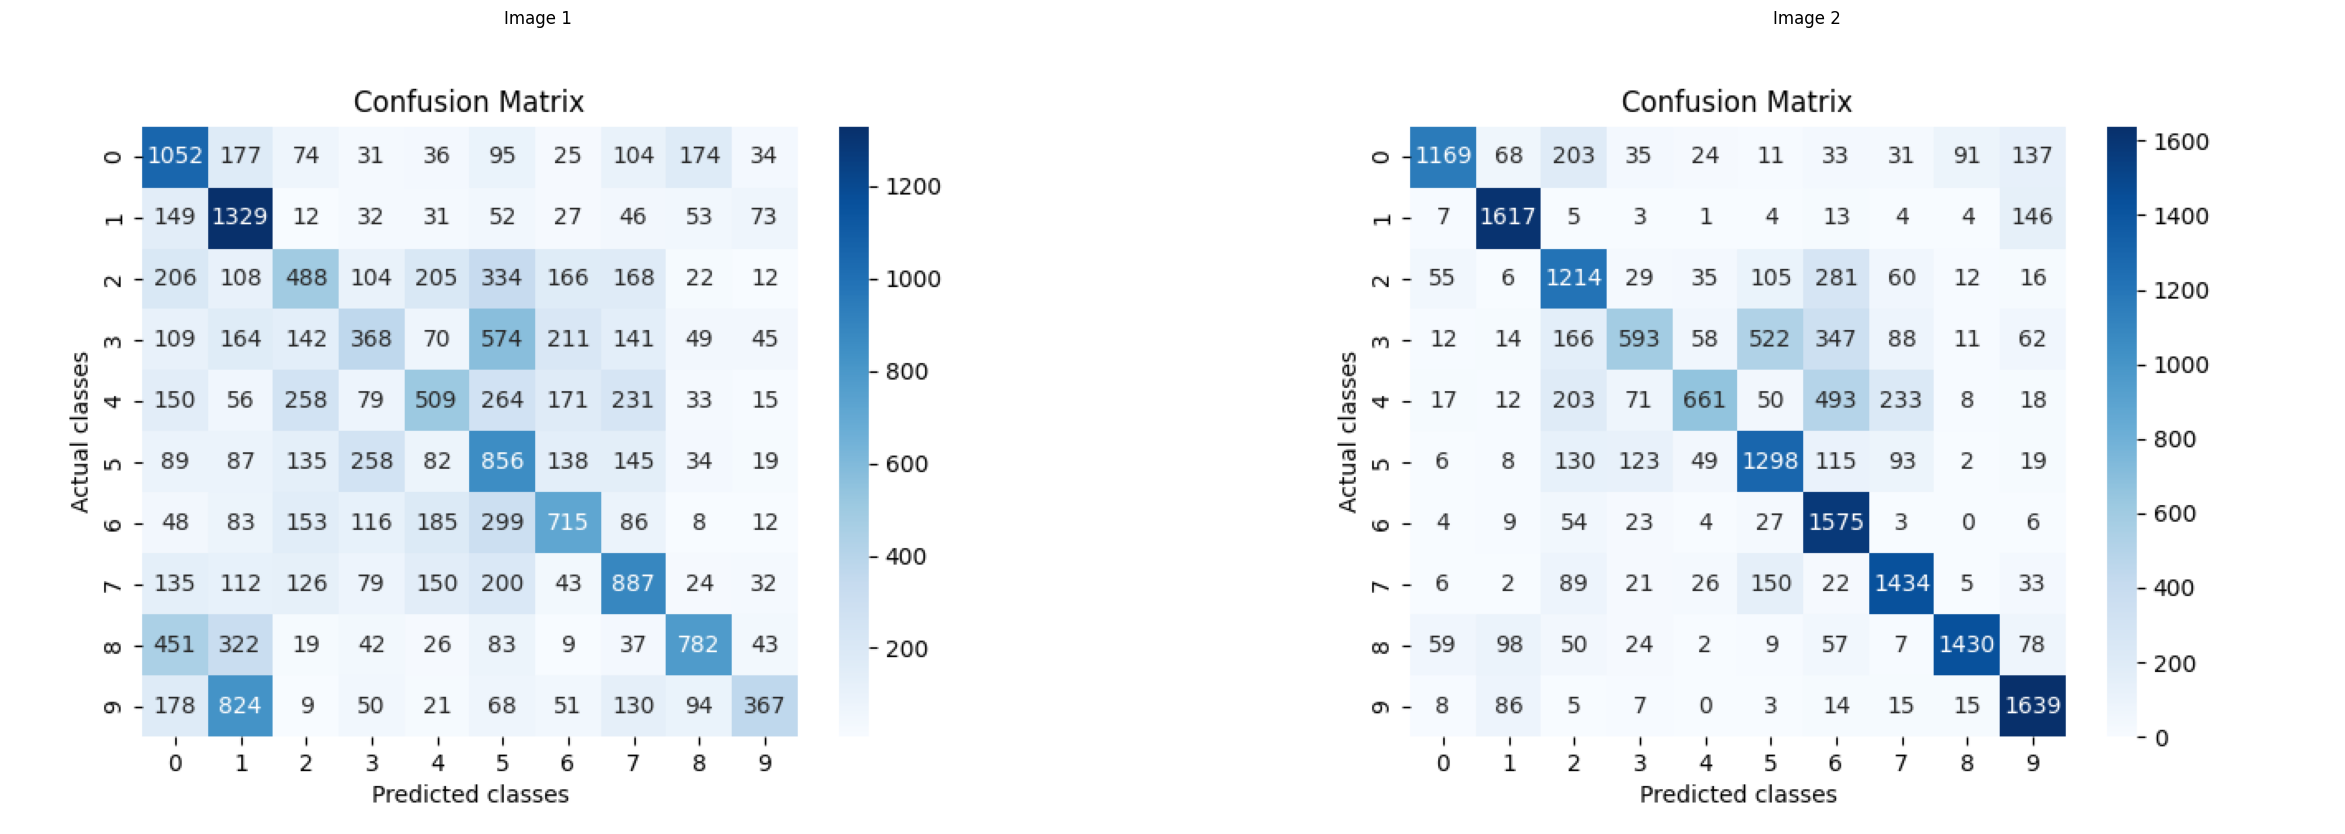

In [37]:
# İki resmi imread ile oku
image1 = cv2.imread('confusion-matrix-mlp.png')
image2 = cv2.imread('confusion-matrix-cnn.png')

# Renk düzenini OpenCV'den Matplotlib'e çevir
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# İki resmi yan yana göstermek için subplot oluştur
fig, axes = plt.subplots(1, 2, figsize=(30, 30))

height, width, _ = image1_rgb.shape

# İlk subplot
axes[0].imshow(image1_rgb, extent=[0, width, 0, height])
axes[0].set_title('Image 1')
axes[0].axis('off')

# İkinci subplot
axes[1].imshow(image2_rgb, extent=[0, width, 0, height])
axes[1].set_title('Image 2')
axes[1].axis('off')

# Görüntüleri göster
plt.show()
plt.close()